In [1]:
import numpy as np
from scipy.constants import physical_constants as pc
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import timeit

### a) Démontrez, par induction ou autrement, que les vecteurs $q_i$ sont orthonormaux.

Ces vecteurs sont construits comme:
\begin{align*}u_0 &= a_0 
\\ u_1 &= a_1 - (q_0\cdot a_1)q_0  
\\ u_2 &= a_2  - (q_0\cdot a_2)q_0  - (q_1\cdot a_2)q_1  
 \\q_0 &= \frac{u_0}{|u_0|}
 \\q_1&=\frac{u_1}{|u_1|}
 \\q_2&=\frac{u_2}{|u_2|}
 \end{align*}
 
 on remarque rapidement que les vecteurs $u_i$ sont orthogonaux par construction. En effet, $u_1$ est simplement la soustraction entre $a_1$ et sa projection sur la direction de $a_0$. La résultante est alors nécessairement orthogonale à $a_0$, et donc $u_0$. Il est est de même pour $u_2$ qu'on force à être orthogonal à $u_1$ et $u_0$ de la même façon.
 
 On peut alors vérifier cette propriété en examinant les produits scalaires. En effet, on peut substituer la projection sur $q_i$ par une projection sur $u_i$ puisqu'ils sont colinéaires.
 
  \begin{align*}
  u_i\cdot u_{i+1} &= u_i\cdot \left(a_{i+1} - \sum_{n = 0}^{{i+1}-1}(u_n\cdot a_{i+1})u_n\right)
  \\ &= u_i\cdot a_{i+1} -  \sum_{n = 0}^{i}u_i\cdot(u_n\cdot a_{i+1})u_n
    \\ &= u_i\cdot a_{i+1} -  \sum_{n = 0}^{i}(u_n\cdot a_{i+1})u_i\cdot u_n
    \\ &= u_i\cdot a_{i+1} -u_i\cdot a_{i+1} + \sum_{n = 0}^{i -1}(u_n\cdot a_{i+1})u_i\cdot u_n
    \\ &= \sum_{n = 0}^{i -1}(u_n\cdot a_{i+1})u_i\cdot u_n
 \end{align*}
 
 Donc, si $u_{i}$ est orthogonal avec tout $u_n$ tel que $n < i$, l'expression précédente devient
 
 \begin{align*}
     u_i\cdot u_{i+1} &=\sum_{n = 0}^{i -1}(u_n\cdot a_{i+1})u_i\cdot u_n
     \\ u_i\cdot u_{i+1}&= 0 
 \end{align*}
 $u_i$ et $ u_{i+1}$ sont alors orthogonaux.
 
 Avec ces conditions, on voit que $u_0$ et $u_1$ sont trivialement orthogonaux, et toutes les combinaisons subséquentes de $u_i$ seront ainsi orthogonales (i.e. preuve par induction).

 
 De plus, comme les $q_i$ sont simplement les vecteurs $u_i$ divisés par leur norme (leur donnant une norme de 1), les vecteurs $q_i$ sont alors nécessairement orthonormés.

### b)
En suivant les instructions de l'énoncé du devoir, il est possible de reconstruire les matrices Q et R pour toute matrice d'entrée. En effet, comme Q et R sont simplement composés de $a_i$, $u_i$ et $q_i$, nous utilisons simplement les relations du numéro précédent pour les calculer. Le code suivant commence calculer tous ces vecteurs, puis les insère dans les matrices Q et R de façon appropriée. 

On entre alors la matrice suivante dans l'algorithme
$$ A = \begin{pmatrix}
1&4&8&4\\ 
4&2&3&7\\ 
8&3&6&9\\ 
4&7&9& 2
\end{pmatrix}$$

On obtient alors:
$$Q = \begin{pmatrix}
0.102&0.558&0.81&0.148\\ 
0.406&-0.107&-0.141&0.896\\ 
0.812&-0.381&0.23&-0.377\\ 
0.406&0.729&-0.521&-0.179
\end{pmatrix}$$
et
$$ R =\begin{pmatrix}
9.849&6.498&10.56&11.372\\ 
0.0&5.981&8.423&-0.484\\ 
0.0&0.0&2.746&3.277\\ 
0.0&0.0&0.0&3.116
\end{pmatrix}$$
On vérifie par la suite que l'algorithme ait bien produit les bons Q et R. En effet :
$$ Q\cdot R = \begin{pmatrix}
1.0&4.0&8.0&4.0\\ 
4.0&2.0&3.0&7.0\\ 
8.0&3.0&6.0&9.0\\ 
4.0&7.0&9.0&2.0
\end{pmatrix}$$

In [2]:
#Fonction imprimant une matrice carrée python 
#dans la console selon la notation LaTeX
def latex_matrix(mat):
    print("\\begin{pmatrix}")
    for i in range(len(mat)):
        for j in range(len(mat)):
            if j != len(mat) - 1:
                print(np.round(mat[i,j],3), end = "&")
            elif i != len(mat) -1:
                print(np.round(mat[i,j],3), end = "\\\\ \n")
            else:
                print(np.round(mat[i,j],3))
    print("\\end{pmatrix}")
    
#Fonction calculant 
def decomposition_QR(A):

    s = len(A)
    R = np.zeros((s,s))
    
    u_liste = []
    q_liste = []
    a_liste = []
    
    for i in range(len(A)):
        ai = np.array(A[:][i])
        ui = ai
        for j in range(i):
            ui = np.subtract(ui, np.dot(q_liste[j], ai)*q_liste[j])
        q_liste.append(ui/np.linalg.norm(ui))
        u_liste.append(ui)
        a_liste.append(ai)
    
    for i in range(len(A)):
        R[i][i] = np.linalg.norm(u_liste[i])
        for j in range(i+1,len(A)):
            R[i][j] = np.dot(q_liste[i],a_liste[j])

    return np.array(q_liste).T, R

               
A = np.array([[1.0,4.0,8.0,4.0], [4.0,2.0,3.0,7.0],[8.0,3.0,6.0,9.0],[4.0,7.0,9.0,2.0]])

Q,R = decomposition_QR(A)
print("A = \n{},\n Q = \n{},\n R = \n{},\n QR = \n{}".format(A,Q,R,np.dot(Q,R)))


A = 
[[ 1.  4.  8.  4.]
 [ 4.  2.  3.  7.]
 [ 8.  3.  6.  9.]
 [ 4.  7.  9.  2.]],
 Q = 
[[ 0.10153462  0.558463    0.80981107  0.1483773 ]
 [ 0.40613847 -0.10686638 -0.14147555  0.8964462 ]
 [ 0.81227693 -0.38092692  0.22995024 -0.37712564]
 [ 0.40613847  0.72910447 -0.5208777  -0.17928924]],
 R = 
[[  9.8488578    6.49821546  10.55960012  11.37187705]
 [  0.           5.98106979   8.4234836   -0.484346  ]
 [  0.           0.           2.74586406   3.27671222]
 [  0.           0.           0.           3.11592335]],
 QR = 
[[ 1.  4.  8.  4.]
 [ 4.  2.  3.  7.]
 [ 8.  3.  6.  9.]
 [ 4.  7.  9.  2.]]


### c) Écrire un programme permattant de calculer les vecteurs propres et valeurs propres d'une matrice carrée réelle.

Les étapes à suivre pour obtenir les valeurs et vecteurs propres à partir des matrices Q et R sont, selon la page 244 du Newmann,:
\begin{enumerate}
\item Créer V, une matrice NxN, qui contiendra les vecteurs propres et l'initialiser comme étant la matrice identité. On sélectionne aussi un seuil $\epsilon$ pour plus tard.
\item On calcule la décomposition QR de la matrice A
\item On actualise A à $A = RQ$
\item On multiplie Q à V par la droite
\item On vérifie si les valeurs hors diagonales sont inférieurs à la valeur seuil
\end{enumerate}
À la fin de l'algorithme, nous avons effectivement diagonalisé A. Ses valeurs propres sont ainsi les valeurs sur la diagonale. Le ma matrice V contient aussi les vecteurs propres dans ses colonnes. Nous avons donc effectivement extrait les valeurs et vecteurs propres de la matrice A.

Après avoir exécuté l'algorithme ci-bas, nous obtenons des valeurs propres de:

$21.0,\ -8.0,\ -3.0,\ \ 1.0$

En utilisant comme entrée la matrice A du numéro précédent. Nous utilisons aussi un $\epsilon$ de $10^{-6}$. La matrice V contenant les vecteur propres est alors:

$$\begin{pmatrix}
 0.43151697 & 0.38357064 & 0.77459667 &-0.25819889  \\
  0.38357064 &-0.43151697 & 0.25819889 & 0.77459667\\
  0.62330229 &-0.52740963 &-0.25819889 &-0.51639778\\
  0.52740963 & 0.62330229 &-0.51639778 & 0.25819889
\end{pmatrix} $$

Si l'on utilise un $\epsilon$ de $1\times 10 ^{-12}$, certaines valeurs changent sur la dernière valeur affichée ($10^{-8}$). Finalement avec un $\epsilon$ de $1\times 10 ^{-18}$, l'exécution devient impossible dans la configuration actuelle. La cause est que la condition d'arrêt est plus petite que la limite de précision machine pour les valeurs d'entrée de la fonction. En effet, peu importe la manipulation faite sur les float d'origine, il y aura toujours du \textit{garbage} de l'ordre de $1\times 10 ^{-16}$ fois les float initiaux hors de la diagonale de la matrice. Par exemple, une matrice comportant des éléments de l'ordre de $10^{-20}$ ne pourra pas avoir un epsilon plus petit que $10^{-26}$.

In [3]:
A = np.array([[1.0,4.0,8.0,4.0], [4.0,2.0,3.0,7.0],[8.0,3.0,6.0,9.0],[4.0,7.0,9.0,2.0]])

def extract_eigenvalues(A, epsilon = 1e-6):
    V = np.identity(len(A))
    condition = True
    while condition:
        condition = False
        Q,R = decomposition_QR(A)
        A = np.dot(R,Q)
        for x in range(len(A)):
            for y in range(len(A)):
                if x!=y:
                    if A[x,y] > epsilon:
                        condition = True
                        break
                if condition:
                    break
                    
        V = np.dot(V,Q)
    eigenvalues = []
    for x in range(len(A)):
        eigenvalues.append(A[x,x])
    return np.flip(np.array(eigenvalues),0), V

values, vectors = extract_eigenvalues(A,1e-6)
print(values,"\n",  vectors)

[  1.  -3.  -8.  21.] 
 [[ 0.43151698 -0.38357064 -0.77459666 -0.25819889]
 [ 0.38357063  0.43151698 -0.2581989   0.77459667]
 [ 0.62330228  0.52740965  0.25819889 -0.51639778]
 [ 0.52740965 -0.62330227  0.51639779  0.25819889]]


## Puits quantique asymétrique

### d)

Dans un état d'énergie $E$, La partie spatiale de la fonction d'onde obéit à l'équation de schr\"odinger indépendante du temps $\hat{H}\psi(x) =
E\psi(x)$, où l'opérateur hamiltonien $\hat{H}$ est donné par 
\begin{align}
\hat{H} = - {\hbar^2\over2M}\,{d^2\over dx^2} + V(x).
\end{align}

En considérant que le puits de potentiel est infini à $x=0$ et $x=L$, on obtient la fonction d'onde suivante 
\begin{align}
\psi(x) = \sum_{n=1}^\infty \psi_n \sin {\frac{\pi n x}{L}},
\end{align}
où les  $\psi_n$ sont les coefficients de Fourier.

Sachant que pour des entier $m, n$ positifs,
\begin{align}
\int_0^L \sin {\pi m x\over L} \,\sin{\pi n x\over L} dx
  = \begin{cases}
      L/2 & \text{si $m=n$,} \\
      0          & \text{autrement,}
    \end{cases} 
\end{align}

On veut montrer que $\hat{H}\psi = E\psi$ implique

\begin{align}
\sum_{n=1}^\infty \psi_n \int_0^L \sin{\pi m x\over L}
                  \hat{H}\sin{\pi n x\over L} dx
  = \frac{L}{2} E \psi_m.
\end{align}

Procédons.


\begin{align}
\hat{H}\psi(x) = \hat{H}\sum_{n} \psi_n \sin {\frac{\pi n x}{L}} = E\sum_{m} \psi_m \sin {\frac{\pi m x}{L}}
\end{align}

On introduit $\sum_{j}\sin {\frac{\pi j x}{L}}$ de chaque côté, 

\begin{align}
\sum_{n} \sum_{j} \hat{H}\psi_n \sin {\frac{\pi n x}{L}}  \sin {\frac{\pi j x}{L}} = E\sum_{m} \sum_{j}  \psi_m \sin {\frac{\pi m x}{L}} \sin {\frac{\pi j x}{L}}
\end{align}

On intègre ensuite de chaque côté,

\begin{align}
\sum_{n} \sum_{j} \psi_n \int_0^L\sin {\frac{\pi n x}{L}} \hat{H} \sin {\frac{\pi j x}{L}} dx = E\sum_{m} \sum_{j}  \psi_m \int_0^L \sin {\frac{\pi m x}{L}} \sin {\frac{\pi j x}{L}} dx
\end{align}

avec la condition d'orthogonalité et en choisissant $j = m$, 

\begin{align}
\sum_{m} \sum_{n}  \psi_n \int_0^L\sin {\frac{\pi n x}{L}} \hat{H} \sin {\frac{\pi m x}{L}} dx &= \frac{L}{2}E\sum_{m} \psi_m \\
\Rightarrow \sum_{n}  \psi_n \int_0^L\sin {\frac{\pi n x}{L}} \hat{H} \sin {\frac{\pi m x}{L}} dx &= \frac{L}{2}E \psi_m \ \ \ \ \text{C.Q.F.D}
\end{align}


On peut ainsi définir les éléments $H_{mn}$ d'une matrice $\mathbf{H}$ comme
\begin{align}
H_{mn} &= {2\over L} \int_0^L \sin{\pi m x\over L}
          \hat{H}\sin{\pi n x\over L}  dx \nonumber\\
       &= {2\over L} \int_0^L \sin{\pi m x\over L}
          \left[ - {\hbar^2\over2M}\,{d^2\over dx^2} + V(x) \right]
          \sin{\pi n x\over L} dx,
\end{align}

Pour ensuite voir que

\begin{align}
\sum_{n} H_{mn} \psi_n = E \psi_m
\end{align}



### e) 

Avec un potentiel de la forme $V(x) = ax/L$, l'expression de $H_mn$ devient

\begin{align}
H_{mn} &= \frac{2}{L} \int_0^L \sin \left(\frac{m\pi x}{L}\right)\left[\frac{-\hbar^2}{2m} \frac{d^2}{dx^2} + \frac{ax}{L}\right] \sin \left(\frac{n\pi x}{L}\right) dx \\
&= \frac{2}{L} \left\{\underbrace{\int_0^L \sin \left(\frac{m\pi x}{L}\right)\left[\frac{-\hbar^2}{2m} \frac{d^2}{dx^2} \sin \left(\frac{n\pi x}{L}\right)\right]dx}_{(1)} + \underbrace{\int_0^L \sin \left(\frac{m\pi x}{L}\right)\frac{ax}{L} \sin \left(\frac{n\pi x}{L}\right)dx}_{(2)} \right\}\\[0.5cm]
(1) &= \left( \frac{n\pi}{L}\right)^2\frac{\hbar^2}{2m} \int_0^L \sin \left(\frac{m\pi x}{L}\right)\sin \left(\frac{n\pi x}{L}\right)dx\\[0.2cm]
&= 
\begin{cases}
      0 & \text{si}\ m\neq n \\
      \frac{1}{4mL}\left(n\pi\hbar\right)^2 & \text{si}\ m=n
\end{cases}
\\[0.5cm]
(2) &= \frac{a}{L}\int_0^L x\sin \left(\frac{m\pi x}{L}\right) \sin \left(\frac{n\pi x}{L}\right)dx \\[0.2cm]
&= 
\begin{cases}
      0 & \text{si $m\neq n$ et $m, n$ sont pairs} \\
      -\frac{a}{L}\left(\frac{2L}{\pi}\right)^2\frac{mn}{m^2-n^2} & \text{si $m\neq n$ et l'un et l'autre est impair} \\
      \frac{aL}{4}& \text{si $m=n$}
\end{cases}
\end{align}

On peut maintenant implémenter une méthode qui calculera, par la combinaison de $(1)$ et $(2)$ avec le facteur $2/L$, les $H_{mn}$ pour des couples $(m, n)$ arbitraires.

In [4]:
def get_H_mn(m, n, a=10, L=5e-10):
    hbar = pc['Planck constant over 2 pi'][0] # J*s
    m_e = pc['electron mass'][0]              # Kg
    a = 10 * 1.6022e-19 # Conversion eV --> Joules
    
    # Résultat du terme de potentiel
    if m != n:

        # Si les deux sont simultanément pairs ou impairs
        if ((m%2 == 0) and (n%2 == 0)) or ((m%2 != 0) and (n%2 != 0)):

            H_mn = 0

        # Si l'un est pair et l'autre est impair, et inversement
        elif ((m%2 == 0) and (n%2 != 0)) or ((m%2 != 0) and (n%2 == 0)):
            H_mn = -(a*4*L/np.pi**2)*(m*n/(m**2 - n**2)**2)
    
    # Si m = n
    else: 
        # Résultat du terme de qte de mvt
        tmp = (n*np.pi*hbar)**2/(4*m_e*L)
        H_mn = a*L/4 + tmp
            
    return 2*(H_mn)/L

H_mn = get_H_mn(2, 1)
             

### f) 
La matrice $\mathbf{H}$ est en théorie infiniment grande. Par contre, pour des dimensions de $10\times10$, il est possible d'obtenir une approximation des niveaux d'énergie du puits de potentiel asymétrique. On implémente ici une méthode servant à créer la matrice $\mathbf{H}$ pour des $m, n$ arbitraires. Par la suite, on se servira de la méthode développée en c) et de la méthode eigh de numpy afin de calculer les valeurs propres de la matrice $\mathbf{H}$.



In [9]:
def get_H(m, n):
    
    H = np.zeros((m, n))
    
    for i in range(m):
        for j in range(n):
            
            H[i, j] = get_H_mn(i+1, j+1)
            
    return H

H = get_H(10, 10)

#H_dag = H.conj().T

# Vérification Hermitienne
#print(H_dag == H)

# Méthode Numpy
eigval, eigvec = np.linalg.eigh(H)
%timeit(np.linalg.eigh(H))
# Décomposition QR
values, vectors = extract_eigenvalues(H, 1e-22)
%timeit(extract_eigenvalues(H, 1e-22))
eigval = eigval/1.6022e-19 
values = values/1.6022e-19
#print(eigval[::2])
#print(values[::2])
#error =100* np.abs(values-eigval)/values
#[print(i,"%",end = ",    ") for i in error[::2]]


10000 loops, best of 3: 33.6 µs per loop
10 loops, best of 3: 24.4 ms per loop


### Discussion

On remarque que les méthodes avec linalg et la décomposition QR donnent des valeurs propres très similaires passé un certain seuil d'$\epsilon$. Par contre, le pourcentage de différence augmente avec l'index de la colonne de la valeur propre. On peut observer les différences dans le tableau suivant:


\begin{array}{cccccc} \hline 
 \text{Méthode}          &  &&\text{Valeur Propre}\ &&\\
 \hdashline
    &\lambda_1 & \lambda_3 & \lambda_5 & \lambda_7  & \lambda_9 \\ 
linalg &   5.84 &  18.66  & 42.65 & 78.72&  126.84\\
QR &    5.84&  18.66&  42.65   &78.72  &126.84\\
\% diff&  1.065e-13 \%  &  1.332e-13 \%  &  5.104e-10 \% &   4.054e-09 \% &   9.245e-09 \%\\
\hline
\end{array}

<h3><center>Tableau 1: Valeurs propres d'énergie des niveaux impairs pour différentes méthodes de calcul</center></h3> 

En ce qui concerne la longueur d'exécution, nous avons mesuré un temps de calcul de 24.4 ms pour l'algorithme basé sur la décomposition QR, valeur très grande comparativment au 33.6 $\mu$s de temps de calcul pour la méthode de numpy.

### g)

En observant la différence entre les deux dimensions de matrice, on remarque  que, tout comme l'écart entre l'algorithme QR et linalg, l'erreur commise sur les valeurs propres augmente très rapidement avec les niveaux, passant de de l'ordre de $10^{-4}eV$ à l'ordre $10^{-1}eV$ entre le niveau 8 et le niveau 10.

On conclus alors simplement que l'exactitude des énergies calculées sont beaucoup plus grandes pour les faibles niveau d'énergie (jusqu'à $E_8$ environ) que pour les niveaux subséquents.

In [6]:

H_100 = get_H(100, 100)

# Méthode Numpy
eigval_100, eigvec_100 = np.linalg.eigh(H_100)

# Décomposition QR

eigval_100 = eigval_100[:10]/1.6022e-19 
print(eigval_100)

[   5.83634607   11.18100492   18.66269382   29.14383869   42.65451742
   59.18441512   78.72823259  101.2834476   126.84877469  155.42351032]



\begin{array}{cccccc} \hline 
 \text{Dimensions}          &  &&\text{Énergie}\ [eV]&&\\
 (m, n) &  &&&&\\
 \hdashline
    & E_2 & E_4 & E_6 & E_8  & E_{10} \\ 
(10, 10)   &   11.18100624   & 29.14384749   & 59.1844677 &   101.2840785   & 155.55313468 \\
(100, 100) &   11.18100492  & 29.14383869    & 59.1844151 &  101.2834476 &  155.42351032\\
\Delta E_i  & 1.323\cdot 10^{-6}  & 8.800\cdot 10^{-6}& 5.258\cdot 10^{-5}& 6.309\cdot 10^{-4} & 0.1296&\\
\hline
\end{array}
<h3><center>Tableau 2: Valeurs propres d'énergie pour les niveaux pairs</center></h3> 

### h) Calcul des fonctions d'onde $\psi (x)$

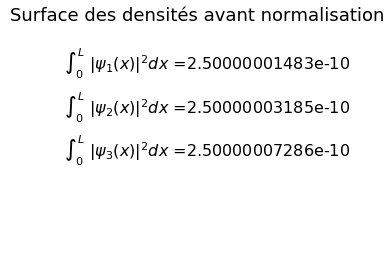

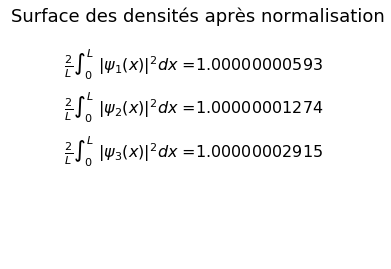

In [24]:
%matplotlib inline
def get_psi_x(mat, n, L=5e-10):
    
    eigvals, eigvecs = np.linalg.eigh(mat)
    
    
    eigvec = eigvecs[:, n-1]
    
    x = np.linspace(0, L, 1000)
    psi_x = np.zeros(len(x))
    
    for i in range(1, len(eigvec)+1):
        psi_n = eigvec[i-1]
        psi_x += psi_n*np.sin((np.pi*i*x)/L)
        
    return psi_x, x      
    
psi_1_x, domain = get_psi_x(H, 1)
psi_2_x, _ = get_psi_x(H, 2)
psi_3_x, _ = get_psi_x(H, 3)

surf_1 = integrate.simps(psi_1_x**2, domain)
surf_2 = integrate.simps(psi_2_x**2, domain)
surf_3 = integrate.simps(psi_3_x**2, domain)

L= 5e-10

plt.title("Surface des densités avant normalisation", fontsize=18)

plt.text(0.1, 0.8, r"$\int_0^L\ |\psi_1(x)|^2 dx$ ="+ str(surf_1), fontsize=16)
plt.text(0.1, 0.6, r"$\int_0^L\ |\psi_2(x)|^2 dx$ ="+ str(surf_2), fontsize=16)
plt.text(0.1, 0.4, r"$\int_0^L\ |\psi_3(x)|^2 dx$ ="+ str(surf_3), fontsize=16)
plt.axis('off')
plt.show()

# Normalisation
densite_1 =  (2/L)*psi_1_x**2
densite_2 =  (2/L)*psi_2_x**2
densite_3 =  (2/L)*psi_3_x**2

# Vérification de la normalisation
dens_1 = integrate.simps(densite_1, domain)
dens_2 = integrate.simps(densite_2, domain)
dens_3 = integrate.simps(densite_3, domain)

plt.title("Surface des densités après normalisation", fontsize=18)

plt.text(0.1, 0.8, r"$\frac{2}{L} \int_0^L\ |\psi_1(x)|^2 dx$ ="+ str(dens_1), fontsize=16)
plt.text(0.1, 0.6, r"$\frac{2}{L} \int_0^L\ |\psi_2(x)|^2 dx$ ="+ str(dens_2), fontsize=16)
plt.text(0.1, 0.4, r"$\frac{2}{L} \int_0^L\ |\psi_3(x)|^2 dx$ ="+ str(dens_3), fontsize=16)
plt.axis('off')
plt.show()



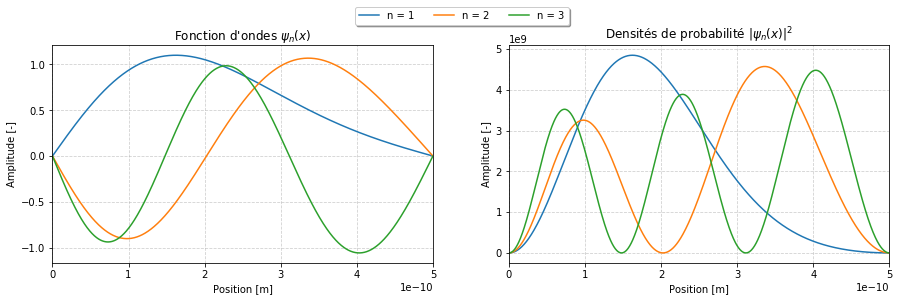

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))

ax1.plot(domain, psi_1_x, label='n = 1')
ax1.plot(domain, psi_2_x, label='n = 2')
ax1.plot(domain, psi_3_x, label='n = 3')

ax1.set_ylabel('Amplitude [-]')
ax1.set_xlabel('Position [m]')
ax1.set_title(r"Fonction d'ondes $\psi_n (x)$")
ax1.grid(which='Major', ls='--', alpha=0.6)
ax1.legend(bbox_to_anchor = (1.37, 1.2), ncol=3, fancybox=True, shadow=True)
ax1.set_xlim([0, 5e-10])

ax2.plot(domain, densite_1, label='n = 1')
ax2.plot(domain, densite_2, label='n = 2')
ax2.plot(domain, densite_3, label='n = 3')


ax2.set_ylabel('Amplitude [-]')
ax2.set_xlabel('Position [m]')
ax2.set_title(r"Densités de probabilité $|\psi_n (x)|^2$")
ax2.grid(which='Major', ls='--', alpha=0.6)
ax2.set_xlim([0, 5e-10])

plt.show()

### Discussion 

Afin de trouver les fonctions d'ondes $\psi_n(x)$, il nous fallait trouver les coefficient de fourier $\psi_n$. De façon analogue à la décomposition en modes normaux d'un système oscillant à plusieurs corps, ce sont les coefficient compris dans les vecteurs propres qui correspondent aux différent modes du système. Ils correspondent donc aux coefficients de Fourier $\psi_n$.
Bref, on peut voir le résultat de l'implémentation d'une routine permettant d'obtenir les fonctions d'ondes sur le domaine dans la figure ci-dessus.

En ce qui concerne la normalisation de la densité de probabilité, la relation d'orthogonalité utilisée plus tôt fais en sorte que les fonctions d'ondes n'étaient pas normalisées et la densité de probabilité se voyait ainsi être sous estimée par un facteur $L/2$. Nous avons donc procédé à la normalisation (i.e. $\left|\psi(x)\right|^2 \rightarrow 2/L \cdot \left|\psi(x)\right|^2$) dans le code plus haut afin de respecter la condition $\int_0^L \left|\psi(x)\right|^2 = 1$. C'est donc une normalisation d'un facteur $2/L$ qui était nécessaire pour la densité de probabilité, ou, de façon équivalente, un facteur 

